# Classification des CV avec NLP

## Contexte du projet

Embaucher les bons talents est un défi pour toutes les entreprises. Ce défi est amplifié par le volume élevé de candidats si l'entreprise est bien réputée. Dans une organisation de services typique, des professionnels possédant une variété de compétences techniques et d'expertise sont embauchés et affectés à des projets pour résoudre les problèmes des clients.

En règle générale, les grandes entreprises n'ont pas assez de temps pour ouvrir chaque CV. L’idée du projet est d’utiliser des algorithmes d'apprentissage automatique pour la tâche de filtrage de CV.
Modalités pédagogiques

Le projet se fait en groupe de 2 personnes.
Critères de performance

Le code doit bien être structuré, avec des visualisations sur le jeux de données (affichage par catégories, affichages des mots les plus fréquents (wordcloud), etc), des explications sur le choix du modèle utilisé et finalement une évaluation de la performance du modèle.


SOURCE /C:\Users\utilisateur\Google Drive\microsoft_ia\Google Drive\cours\IA\nlp\KATA de 1à 4            

#  I - Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from bs4 import BeautifulSoup
import re
import nltk
import nltk.data
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import seaborn as sns
from gensim.models import Word2Vec 

# II - Informations sur les données

In [2]:
data= pd.read_csv('./DataSet.csv', sep = ",")
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [3]:
print(data.shape)

(962, 2)


Notre jeu de données contient 2 colonnes et 962 lignes.

In [4]:
print ("Ci-dessous les catégories de métiers contenues dans notre jeu de données :")
(data['Category'].unique(),'\n')

Ci-dessous les catégories de métiers contenues dans notre jeu de données :


(array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
        'Mechanical Engineer', 'Sales', 'Health and fitness',
        'Civil Engineer', 'Java Developer', 'Business Analyst',
        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
        'Operations Manager', 'Python Developer', 'DevOps Engineer',
        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
       dtype=object),
 '\n')

In [5]:
print("Ci-dessous le nombre de cv par catégorie ou liste de métiers")
data[data.columns[0]].value_counts()

Ci-dessous le nombre de cv par catégorie ou liste de métiers


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Mechanical Engineer          40
Data Science                 40
Operations Manager           40
ETL Developer                40
Blockchain                   40
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

L'intitulé de poste le plus représenté est Java Developper.Nous avons 84 CV sur 962 candidatures avec cet intitulé. Nous avons 25 catégories de métiers.

# III - Exploration des données

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(close=None, block=None)>

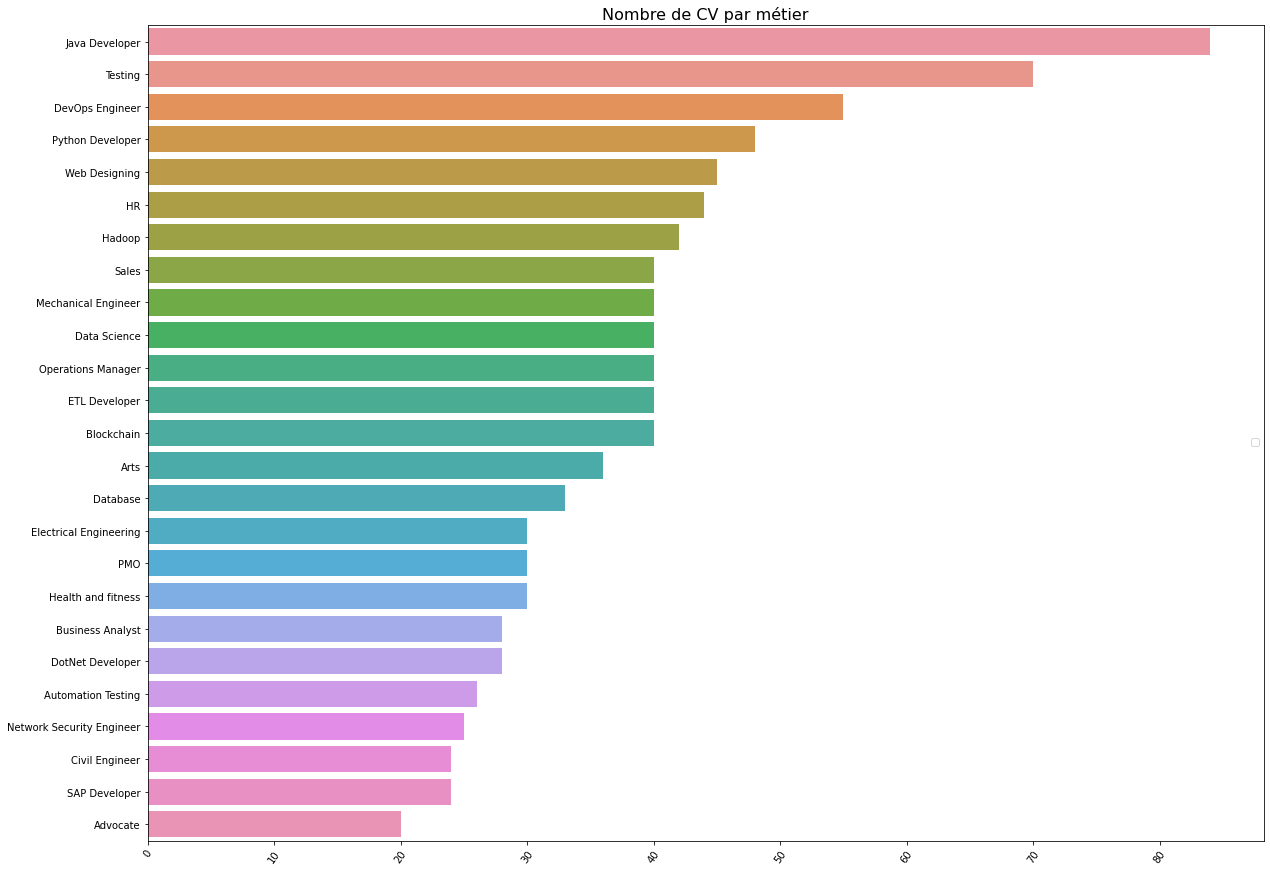

In [6]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=55)
#sns.countplot(y="Category", data=data)
sns.barplot(data['Category'].value_counts().values, data['Category'].value_counts().index)
plt.legend(bbox_to_anchor=(1, 0.5))
myText = plt.title("Nombre de CV par métier"); myText.set_fontsize(16)
plt.show

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


Il n'y a pas de données manquantes dans le dataset.

## vision globale du dataset

In [8]:
data.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


Nous avons 25 intitulés de poste dans le dataset . 
La classe la plus utilisée est "Java Developer" qui est utilisée 84 fois sur un total de 962,

Dans la colonne résumé il semble y avoir cependant des éléments qui sont répétés 18 fois.

In [9]:
data['Resume'].value_counts()

Technical Skills Web Technologies: Angular JS, HTML5, CSS3, SASS, Bootstrap, Jquery, Javascript. Software: Brackets, Visual Studio, Photoshop, Visual Studio Code Education Details \r\nJanuary 2015 B.E CSE Nagpur, Maharashtra G.H.Raisoni College of Engineering\r\nOctober 2009  Photography Competition Click Nagpur, Maharashtra Maharashtra State Board\r\n    College Magazine OCEAN\r\nWeb Designer \r\n\r\nWeb Designer - Trust Systems and Software\r\nSkill Details \r\nPHOTOSHOP- Exprience - 28 months\r\nBOOTSTRAP- Exprience - 6 months\r\nHTML5- Exprience - 6 months\r\nJAVASCRIPT- Exprience - 6 months\r\nCSS3- Exprience - Less than 1 year months\r\nAngular 4- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Trust Systems and Software\r\ndescription - Projects worked on:\r\n1. TrustBank-CBS\r\nProject Description: TrustBank-CBS is a core banking solution by Trust Systems.\r\nRoles and Responsibility:\r\nâ Renovated complete UI to make it more modern, user-friendly, maintaina

# IV -  Nettoyage des données et prétraitement de texte

L’objectif de cette partie est de nettoyer le texte afin de faciliter l’apprentissage. Pour entraîner Word2Vec,  l’algorithme s’appuie sur le contexte plus large de la phrase afin de produire des vecteurs de mots de haute qualité.

Pour cela , on supprime :

    - les balises
    
    - les caractères spéciaux, les majuscules
    
 et on sépare les phrases en mots.
 

In [10]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [11]:
def review_to_wordlist( review, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    review_text = re.sub('\[[^]]*\]', ' ', review_text)
    
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [12]:
clean_resume = []
for resume in data["Resume"]:
    clean_resume.append( review_to_wordlist( resume, remove_stopwords=True ))

In [13]:
print(clean_resume[0][:20])

['skills', 'programming', 'languages', 'python', 'pandas', 'numpy', 'scipy', 'scikit', 'learn', 'matplotlib', 'sql', 'java', 'javascript', 'jquery', 'machine', 'learning', 'regression', 'svm', 'na', 'bayes']


In [14]:
data["clean"]=clean_resume

In [15]:
data.head()

,Category,Resume,clean
0,Data Science,Skills * Programming Languages: Python (pandas...,"[skills, programming, languages, python, panda..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,"[education, details, may, may, b, e, uit, rgpv..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","[areas, interest, deep, learning, control, sys..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,"[skills, r, python, sap, hana, tableau, sap, h..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","[education, details, mca, ymcaust, faridabad, ..."


# V- Nuage de mots

L'objectif ici est de faire apparaitre visullement les mots les plus utilisés via la méthodeWordCloud.

In [16]:
#préparation données pour le wordcloud
all_words = []
for i in clean_resume:
    for j in i:
        all_words.append(j)
words = [word for word in all_words]
text = " ".join(words)

In [17]:


# compter les mots les plus fréquents
from collections import Counter

counts = Counter(words)


counts.most_common(25)




[('exprience', 3829),
 ('company', 3578),
 ('project', 3498),
 ('months', 3288),
 ('description', 3122),
 ('details', 3096),
 ('data', 2156),
 ('management', 1999),
 ('team', 1950),
 ('maharashtra', 1449),
 ('system', 1425),
 ('testing', 1349),
 ('year', 1344),
 ('database', 1280),
 ('development', 1203),
 ('business', 1196),
 ('ltd', 1177),
 ('test', 1174),
 ('less', 1145),
 ('using', 1124),
 ('sql', 1121),
 ('skill', 1117),
 ('january', 1090),
 ('client', 1085),
 ('java', 1076)]

Text(0.5, 1.0, 'nuage de mots les plus fréquents')

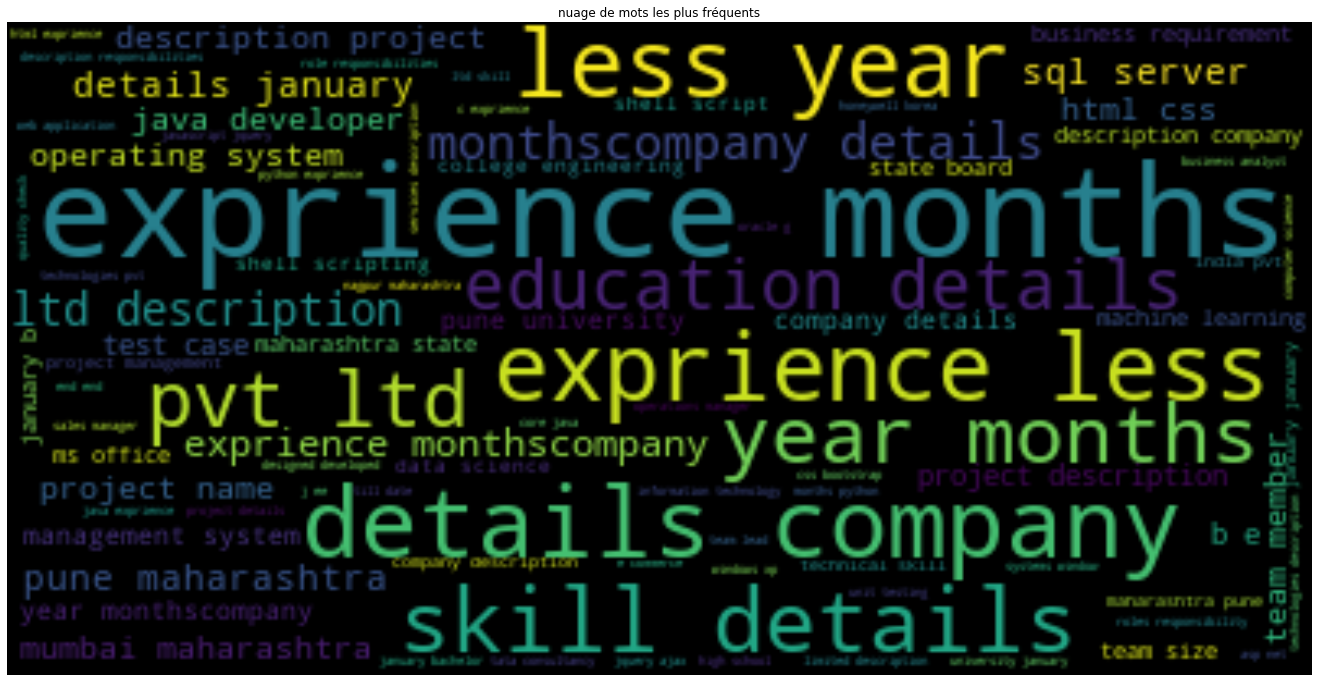

In [18]:
wcloud = WordCloud(max_font_size=80).generate(text)
plt.figure(figsize=(24,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.title("nuage de mots les plus fréquents")

exprience, company et project sont les mots les plus utilisés.

# VI - Préparation des données pour le modèle

Pour cette étape, nous utilisons  le tokenizer punkt de NLTK (modèle entrainable non supervisé) pour le fractionnement des phrases.
Word2Vec attend des phrases uniques, chacune représente une liste de mots. En d’autres termes, le format d’entrée est une liste de listes.
Il n’est pas du tout simple de diviser un paragraphe en phrases. Il existe toutes sortes de pièges dans le langage naturel

Il est important de diviser phrase par phrase, pour une meilleure qualité de l'information avant de diviser en mots.

In [19]:
# Download the punkt tokenizer for sentence splitting
import nltk.data
# nltk.download()   

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Define a function to split a review into parsed sentences
def review_to_sentences( review, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(review.strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( review_to_wordlist( raw_sentence, \
              remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

In [20]:
import time
sentences = []  # Initialize an empty list of sentences

start = time.time()
print ("Parsing sentences from training set")
for resume in data["Resume"]:
    sentences += review_to_sentences(resume, tokenizer)
       
end = time.time()
elapsed = end - start

elapsed

Parsing sentences from training set


21.57086706161499

In [67]:

sentences = []

# Ajout des reviews.
for review in data["Resume"]:
    sentences += review_to_sentences(review, tokenizer)

print(len(sentences))
print()
print(sentences[:2])

21599

[['skills', 'programming', 'languages', 'python', 'pandas', 'numpy', 'scipy', 'scikit', 'learn', 'matplotlib', 'sql', 'java', 'javascript', 'jquery'], ['machine', 'learning', 'regression', 'svm', 'na', 've', 'bayes', 'knn', 'random', 'forest', 'decision', 'trees', 'boosting', 'techniques', 'cluster', 'analysis', 'word', 'embedding', 'sentiment', 'analysis', 'natural', 'language', 'processing', 'dimensionality', 'reduction', 'topic', 'modelling', 'lda', 'nmf', 'pca', 'neural', 'nets']]


### encodage des targets => catégory

In [21]:
from sklearn import preprocessing
# Labelisation sur la colonne 'Category'
le = preprocessing.LabelEncoder()
data["classe"]=le.fit_transform(data.Category)

In [22]:
data.head()

,Category,Resume,clean,classe
0,Data Science,Skills * Programming Languages: Python (pandas...,"[skills, programming, languages, python, panda...",6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,"[education, details, may, may, b, e, uit, rgpv...",6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","[areas, interest, deep, learning, control, sys...",6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,"[skills, r, python, sap, hana, tableau, sap, h...",6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","[education, details, mca, ymcaust, faridabad, ...",6


In [23]:
# Séparation du jeu de données
X_train, X_test, y_train, y_test = train_test_split(data.clean, data.classe, test_size=200, random_state=42)

In [24]:
print(X_train.shape)
print(y_train.shape)

(762,)
(762,)


# Apprentissage et enregistrement du modèle

Avec la liste des phrases bien nettoyées, nous sommes prêts à entraîner le modèle. Il existe un certain nombre de choix de paramètres qui affectent la durée d’exécution et la qualité du modèle final produit.


* **Architecture**: Les options d’architecture sont skip-gram (par défaut) ou CBOW. Il a été constaté
que skip-gramme était légèrement plus lent mais produisait de meilleurs résultats.
* **Algorithme d’entraînement**: Hierarchical softmax (default) ou negative sampling. Optez
par la valeur par défault qui semble bien fonctionner.
* **Sous-échantillonnage des mots fréquents**: La documentation Google recommande des
valeurs comprises entre .00001 et .001.
* **Word vector dimensionality**: plus de features se traduisent par des temps d’exécution
lentes, mais pas toujours, de meilleurs modèles. Les valeurs raisonnables peuvent être comprises
entre des dizaines et des centaines. Optez par la valeur 300.
* **Context / window size**: Combien de mots de contexte l’algorithme d’apprentissage doit-il
prendre en compte?
* **Worker threads**: Nombre de processus parallèles à exécuter. Ceci est spécifique à
l’ordinateur, mais entre 4 et 6 devraient fonctionner sur la plupart des systèmes.
* **Minimum word count**: Cela permet de limiter la taille du vocabulaire à des mots significatifs.
Tout mot qui n’apparaît pas au moins autant de fois dans tous les documents est ignoré.
Les valeurs adaptées peuvent être comprises entre 10 et 100.
Dans ce cas, comme chaque film se produit 30 fois, nous définissons le nombre minimum de
mots sur 40, pour éviter d’attacher trop d’importance aux titres de films individuels.
Cela a abouti à une taille globale du vocabulaire d’environ 15 000 mots. Des valeurs plus
élevées aident également à limiter le temps d’exécution.
Le choix des paramètres n’est pas facile, mais une fois que vous avez choisi vos paramètres, créer
un modèleWord2Vec est simple, pour ce faire:

In [25]:
# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

In [26]:
# Initialize and train the model (this will take some time)

w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=4)
t = time.time()

w2v_model.build_vocab(X_train, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time.time() - t) / 60, 2)))

Time to build vocab: 0.02 mins


In [27]:
t = time.time()

w2v_model.train(X_train, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time.time() - t) / 60, 2)))

Time to train the model: 0.18 mins


In [28]:
w2v_model.wv.vectors.shape

(1944, 300)

In [29]:
model_name = "model_test_300"
w2v_model.save(model_name)

# Exploration des résultats du modèle

In [30]:
w2v_model.wv.most_similar(positive=["experience"])

[('years', 0.822695255279541),
 ('hands', 0.7242732048034668),
 ('expertise', 0.6060266494750977),
 ('labs', 0.5929087400436401),
 ('total', 0.5906510353088379),
 ('brand', 0.5897347927093506),
 ('knowledge', 0.5685513019561768),
 ('wipro', 0.5520123243331909),
 ('working', 0.5354630351066589),
 ('excellent', 0.5198163986206055)]

## Moyenne Vectorielle

In [31]:
def makeFeatureVec(words, model, num_features):
    # Function to average all of the word vectors in a given
    # paragraph
    #
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((num_features,),dtype="float32")
    #
    nwords = 0.
    # 
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, for speed 
    index2word_set = set(model.wv.index2word)
    #
    # Loop over each word in the review and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    # 
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec,nwords)
    return featureVec

In [32]:
def getAvgFeatureVecs(reviews, model, num_features):
    # Given a set of reviews (each one a list of words), calculate 
    # the average feature vector for each one and return a 2D numpy array 
    # 
    # Initialize a counter
    counter = 0
    # 
    # Preallocate a 2D numpy array, for speed
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    # 
    # Loop through the reviews
    for review in reviews:
       #
       # Print a status message every 1000th review
       if counter%100. == 0.:
           print ("Review %d of %d" % (counter, len(reviews)))            
       # 
       # Call the function (defined above) that makes average feature vectors
       reviewFeatureVecs[counter] = makeFeatureVec(review, model, num_features)
       #
       # Increment the counter
       counter = counter + 1
    return reviewFeatureVecs

In [33]:
trainDataVecs = getAvgFeatureVecs(X_train, w2v_model, 300 )
testDataVecs = getAvgFeatureVecs(X_test, w2v_model, 300 )

Review 0 of 762
Review 100 of 762
Review 200 of 762
Review 300 of 762
Review 400 of 762
Review 500 of 762
Review 600 of 762
Review 700 of 762
Review 0 of 200
Review 100 of 200


In [34]:
print(trainDataVecs.shape)
print(testDataVecs.shape)

(762, 300)
(200, 300)


In [35]:
y_train.shape

(762,)

## Test1 : RandomForestClassifier

In [36]:
# Fit a random forest to the training data, using 100 trees
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier( n_estimators = 100 )
forest = forest.fit( trainDataVecs, y_train )

# Test & extract results 
result = forest.predict( testDataVecs )

# Write the test results 
output = pd.DataFrame( data={"id":y_test, "sentiment":result} )

In [37]:
output

,id,sentiment
344,15,15
381,15,15
351,15,15
778,13,13
277,14,14
...,...,...
549,18,18
280,14,14
109,1,1
77,12,12


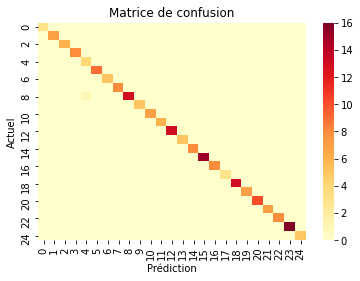

In [38]:
import seaborn as sns

cf_matrix = confusion_matrix(y_test, result)
sns.heatmap(cf_matrix,fmt='', cmap='YlOrRd')
plt.title("Matrice de confusion")
plt.ylabel('Actuel')
plt.xlabel('Prédiction')

plt.show()

In [39]:
score = accuracy_score(y_test,result)
print('Accuracy: {}'.format(round(score,3)))


Accuracy: 0.995


Notre modèle semble  pertinent  et permettrait de transférer les candidatures aux bons services.

### Test 2 : sac de centroîdes

Le but ici est de créer des "clusters" de mots cad regrouper la similitude des mots.
Le nombre de clusters est par convetion défini à 5, les études ayant montré que les résultats étaient meilleurs ainsi.

In [73]:
from sklearn.cluster import KMeans
import time

start = time.time() # Start time  23 minutes
# Set "k" (num_clusters) to be 1/5th of the vocabulary size, or an
# average of 5 words per cluster

num_clusters = w2v_model.wv.vectors.shape[0] / 5
print("Le nombre de clusters est  :" , num_clusters)

# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans( n_clusters = int(num_clusters) )
idx = kmeans_clustering.fit_predict(w2v_model.wv.vectors)

# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print ("Time taken for K Means clustering: ", elapsed, "seconds.")

Le nombre de clusters est  : 388.8
Time taken for K Means clustering:  26.18631148338318 seconds.


In [41]:
word_centroid_map = dict(zip( w2v_model.wv.index2word, idx ))
word_centroid_map.values()

dict_values([152, 97, 97, 152, 97, 152, 139, 296, 157, 40, 117, 340, 84, 337, 340, 142, 97, 175, 151, 31, 331, 152, 141, 337, 151, 117, 173, 265, 259, 49, 160, 96, 141, 30, 97, 97, 116, 350, 122, 44, 173, 97, 31, 117, 175, 152, 337, 97, 97, 105, 73, 39, 107, 175, 117, 296, 107, 141, 337, 220, 4, 96, 117, 32, 141, 21, 259, 66, 288, 3, 90, 107, 16, 350, 3, 116, 0, 141, 34, 83, 297, 141, 260, 96, 16, 281, 371, 161, 174, 53, 218, 113, 90, 22, 370, 57, 32, 117, 141, 0, 370, 34, 2, 53, 330, 103, 352, 32, 185, 297, 363, 44, 32, 116, 345, 35, 149, 31, 253, 331, 29, 22, 22, 122, 119, 103, 73, 345, 259, 9, 142, 80, 174, 160, 117, 297, 97, 2, 19, 26, 80, 137, 90, 90, 265, 248, 22, 193, 71, 220, 261, 40, 166, 46, 81, 83, 73, 376, 117, 97, 44, 2, 214, 40, 91, 160, 113, 365, 21, 339, 345, 2, 38, 53, 26, 10, 27, 259, 117, 218, 376, 90, 151, 294, 331, 116, 187, 88, 272, 157, 18, 116, 187, 22, 341, 115, 297, 196, 337, 250, 32, 331, 332, 265, 286, 14, 30, 371, 119, 331, 89, 331, 23, 90, 325, 244, 263, 3

In [42]:
# For the first 10 clusters
for cluster in range(0,10):
    #
    # Print the cluster number  
    print ("\nCluster %d" % cluster)
    #
    # Find all of the words for that cluster number, and print them out
    words = []
    values=list(word_centroid_map.values())
    keys=list(word_centroid_map.keys())
    for i in range(0,len(word_centroid_map.values())):
        if( values[i] == cluster ):
            words.append(keys[i])
    print (words)


Cluster 0
['systems', 'tools', 'packages', 'serck']

Cluster 1
['banking', 'domain', 'vision', 'retail']

Cluster 2
['developed', 'roles', 'designed', 'responsibility', 'complete', 'dashboard', 'specially', 'tester', 'landing']

Cluster 3
['worked', 'projects', 'member', 'full', 'ideas', 'startup']

Cluster 4
['role', 'played', 'midc']

Cluster 5
['bugs', 'critical', 'resolving', 'bug', 'fixing', 'resolution', 'ordinate']

Cluster 6
['achievements', 'joined']

Cluster 7
['writing', 'plans', 'execution']

Cluster 8
['quotations', 'negotiations', 'finalizing', 'collection']

Cluster 9
['clients', 'department', 'mis', 'units', 'institutional', 'globally', 'professionals']


La répartition de nos clusters n'est pas homogène.

### Création des sacs de centroides et fractionnement du jeu de données

In [75]:
def create_bag_of_centroids( wordlist, word_centroid_map ):
    #
    # The number of clusters is equal to the highest cluster index
    # in the word / centroid map
    num_centroids = max( word_centroid_map.values() ) + 1
    #
    # Pre-allocate the bag of centroids vector (for speed)
    bag_of_centroids = np.zeros( num_centroids, dtype="float32" )
    #
    # Loop over the words in the review. If the word is in the vocabulary,
    # find which cluster it belongs to, and increment that cluster count 
    # by one
    for word in wordlist:
        if word in word_centroid_map:
            index = word_centroid_map[word]
            bag_of_centroids[index] += 1
    #
    # Return the "bag of centroids"
    return bag_of_centroids

In [44]:
# Pre-allocate an array for the training set bags of centroids (for speed)
train_centroids = np.zeros( (X_train.size, int(num_clusters)), dtype="float32" )
print(train_centroids.shape)


# Transform the training set reviews into bags of centroids
counter = 0
for review in X_train:
    train_centroids[counter] = create_bag_of_centroids( review, word_centroid_map )
    counter += 1

(762, 388)


In [45]:
# Repeat for test reviews 
test_centroids = np.zeros(( X_test.size, int(num_clusters)), dtype="float32" )

counter = 0
for review in X_test:
    test_centroids[counter] = create_bag_of_centroids( review, word_centroid_map )
    counter += 1

In [46]:
# Fit a random forest and extract predictions 
forest = RandomForestClassifier(n_estimators = 100)

# Fitting the forest may take a few minutes
print ("Fitting a random forest to labeled training data...")
forest = forest.fit(train_centroids,y_train)
result = forest.predict(test_centroids)

# Write the test results 
output = pd.DataFrame(data={"catégorie":y_test, "prédiction":result})

Fitting a random forest to labeled training data...


In [47]:
output

,catégorie,prédiction
344,15,15
381,15,15
351,15,15
778,13,13
277,14,14
...,...,...
549,18,18
280,14,14
109,1,1
77,12,12


Text(0.5, 15.0, 'Prédiction')

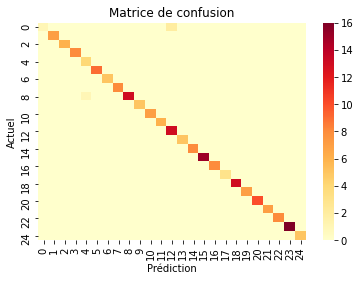

In [78]:
import seaborn as sns

cf_matrix = confusion_matrix(y_test, result)

sns.heatmap(cf_matrix,fmt='', cmap='YlOrRd')
plt.title("Matrice de confusion")
plt.ylabel('Actuel')
plt.xlabel('Prédiction')

In [49]:
score = accuracy_score(y_test,result)
print('Accuracy: {}'.format(score))

Accuracy: 0.985


Avec une accuracy de 98,5%, nous pouvons dire que notre modèle est fiable.

# LECTURE DES CV

In [50]:
#images = convert_from_path('/home/belval/example.pdf')

In [51]:
import cv2
#image avec texte
img_texte = cv2.imread('cv_data.png', 0) #noir et blanc

#affichage
#cv2.imshow('image texte', img_texte)
#cv2.waitKey(0)                #pressez une touche pour continuer
#cv2.destroyAllWindows()

python-tesseract est un outil de reconnaissance optique de caractères (OCR) pour Python, c’est à dire un logiciel capable de reconnaître du texte à partir d’une image.

In [52]:
import pytesseract
import os
os.environ['TESSDATA_PREFIX']='C:\Program Files (x86)\Tesseract-OCR'

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'
#threshold_img = cv2.threshold(img_texte, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
#supposé améliorer la lecture du texte
#print(pytesseract.image_to_string(img_texte, lang='fra'))
cv_test = pytesseract.image_to_string(img_texte, lang='eng')

In [53]:
cv_test

"Diana Dawa\n\nData Scientist\n\nData Scientist with 4+ years of broad—based experience in building data-intensive applications, overcoming\ncomplex architectural, and scalability issues in diverse industries. Proﬁcient in predictive modeling, data\nprocessing, and data mining algorithms, as well as scripting languages, including Python and Java Capable\nof creating, developing, testing, and deploying highly adaptive diverse services to translate business and\nfunctional qualiﬁcations into substantial deliverables.\n\n \n\n>14 diana@novoresume.com\nO PaloAlto,CA\n\nin |inkedin.com/in/diana.dawa\n\nWORK EXPERIENCE\n\nData Scientist\n\nFuture Energy Ltd.\n06/2078 , Present Palo Alto, CA\n\n- Develop action plans to mitigate risks in decision making\nwhile increasing proﬁtability by leveraging data science,\n\n‘ Drive the interaction and partnership between the managers\nto ensure active cooperation in identifying as well as deﬁning\nanalytical needs, and generating the puII-through of in

In [54]:
clean_test = review_to_wordlist( cv_test, remove_stopwords=True )

In [55]:
centroids_cv_test= create_bag_of_centroids( clean_test, word_centroid_map ) 

In [56]:
centroids_cv_test

array([ 2.,  0.,  2.,  0.,  0.,  1.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  6., 14.,  3.,  0.,  0.,  1.,  0.,  0.,  2.,
        4.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        0.,  4.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,
        0.,  0., 13.,  0.,  0.,  1.,  1.,  2.,  1.,  2.,  0.,  3.,  1.,
        0.,  0.,  0.,  0.,  1.,  1.,  5.,  0.,  0.,  4.,  0.,  0.,  1.,
        1.,  1.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        4.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  2.,  0.,  0.,  0.,  0.,  1.,  1.,  0., 18.,  0.,  7.,  3.,
        0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  2.,  2.,  0.,  0.,  0.,
        2.,  0.,  0.,  0.,  3.,  4.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,
        1.,  0.,  0.,  0.,  1.,  1.,  6.,  0.,  0.,  0.,  0.,  0

In [57]:
centroids_cv_test = centroids_cv_test.reshape(1, -1)

In [58]:
result_test = forest.predict(centroids_cv_test)

In [59]:
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [60]:
a = result_test
print(list(mapping.keys())[list(mapping.values()).index(a)])

Data Science


Notre model classe le cv de Diana en Data Science, soit dans la bonne catégorie

In [61]:
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)

In [62]:
#paths to cvs
carrie = "C:/Users/utilisateur/Google Drive/microsoft_ia/Google Drive/projets/ia/tricv/Nouveau dossier/Resume&Job_Description/Original_Resumes/3Carrie.pdf"
vistra = "C:/Users/utilisateur/Google Drive/microsoft_ia/Google Drive/projets/ia/tricv/Nouveau dossier/Resume&Job_Description/Original_Resumes/Legal/Vistra SG - Legal CounselAccorhotels_Sonya Vij_Legal Counsel.pdf"

In [80]:
from pdf2image import convert_from_path

images = convert_from_path(vistra, 500,poppler_path=r'C:/Users/utilisateur/poppler-21.03.0/')
for i, image in enumerate(images):
    fname = 'image'+str(i)+'.png'
    image.save(fname, "PNG")

PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

In [79]:
#image avec texte
img_texte = cv2.imread('image0.png', 0) #noir et blanc
cv_test_2 = pytesseract.image_to_string(img_texte, lang='eng')
clean_test = review_to_wordlist( cv_test_2, remove_stopwords=True )
centroids_cv_test= create_bag_of_centroids( clean_test, word_centroid_map ) 
centroids_cv_test = centroids_cv_test.reshape(1, -1)
result_test = forest.predict(centroids_cv_test)
a = result_test
print(list(mapping.keys())[list(mapping.values()).index(a)])

TypeError: Unsupported image object

In [ ]:
mapping